In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

# Analysis

In [115]:
def collect_data(folder,rolling):
    onlyfiles = [f for f in listdir(folder) if isfile(join(folder, f)) and f.endswith('.csv')]
    random = np.zeros((len(onlyfiles),101))
    left = np.zeros((len(onlyfiles),101))
    lvl1 = np.zeros((len(onlyfiles),101))
    lvl2 = np.zeros((len(onlyfiles),101))
    loss_p1 = np.zeros((len(onlyfiles),101))
    loss_p2 = np.zeros((len(onlyfiles),101))
    game_length = np.zeros((len(onlyfiles),101))
    wins = np.zeros((len(onlyfiles),101))
    ties = np.zeros((len(onlyfiles),101))
    for i,file in enumerate(onlyfiles):
        df = pd.read_csv(folder+file)
        training_rounds = df['training_round'].rolling(rolling).mean()
        random[i,:] = df['random'].rolling(rolling).mean()
        left[i,:] = df['left'].rolling(rolling).mean()
        lvl1[i,:] = df['lvl1'].rolling(rolling).mean()
        lvl2[i,:] = df['lvl2'].rolling(rolling).mean()
        loss_p1[i,:] = df['loss_p1'].rolling(rolling).mean()
        loss_p2[i,:] = df['loss_p2'].rolling(rolling).mean()
        game_length[i,:] = df['game_length'].rolling(rolling).mean()
        wins[i,:] = df['wins_p1'].rolling(rolling).mean()
        ties[i,:] = df['ties'].rolling(rolling).mean()
    return training_rounds,random,left,lvl1,lvl2,loss_p1,loss_p2,game_length,wins,ties

In [116]:
def plot(x,data,legend=[],axis=plt):
    for y in data:
        axis.plot(x, y.mean(axis=0))
        axis.fill_between(x, y.mean(axis=0)-y.std(axis=0), y.mean(axis=0)+y.std(axis=0), alpha=0.5)
    if len(legend)>0:
        axis.legend(legend)

In [117]:
def plot_networks(networks,data,ylabel,legend,legend_title):
    fig, axs = plt.subplots(1, 4,sharex=True,sharey=True,figsize=(15,5))
    for i,network in enumerate(networks):
        plot(training_rounds,data[network],[],axs[i])
        axs[i].set_title('Network '+network)

    for ax in axs.flat:
        ax.set(xlabel='Training Rounds', ylabel=ylabel)

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    # Create the legend
    fig.legend(labels=legend,loc="right",title=legend_title);

    # Adjust the scaling factor to fit your legend text completely outside the plot
    # (smaller value results in more space being made for the legend)
    plt.subplots_adjust(right=0.91)
    plt.show()

In [118]:
def analysis_networks(networks,loss_fn,exploration,encoding,optimizer,experience,rolling):
    benchmark = {}
    stats_loss = {}
    stats_training = {}
    for network in networks:
        folder = './training/'+network+'_'+loss_fn+'_'+exploration+'_'+encoding+'_'+optimizer+'_'+experience+'/'
        training_rounds,random,left,lvl1,lvl2,loss_p1,loss_p2,game_length,wins,ties = collect_data(folder,rolling)
        benchmark[network] = [random,lvl1,lvl2]
        stats_loss[network] = [loss_p1,loss_p2]
        stats_training[network] = [wins,ties]

    ylabel = 'Win Percentage'
    legend = ['Random','Lvl 1','Lvl 2']
    legend_title = "Opponent"
    plot_networks(networks,benchmark,ylabel,legend,legend_title)
    ylabel = 'Loss'
    legend = ['Loss P1','Loss P2']
    legend_title = "Loss"
    plot_networks(networks,stats_loss,ylabel,legend,legend_title)
    ylabel = 'Percentage'
    legend = ['Wins P1','Ties']
    legend_title = "Stats"
    plot_networks(networks,stats_training,ylabel,legend,legend_title)

## Comparison of networks - No Exploration & No Experience

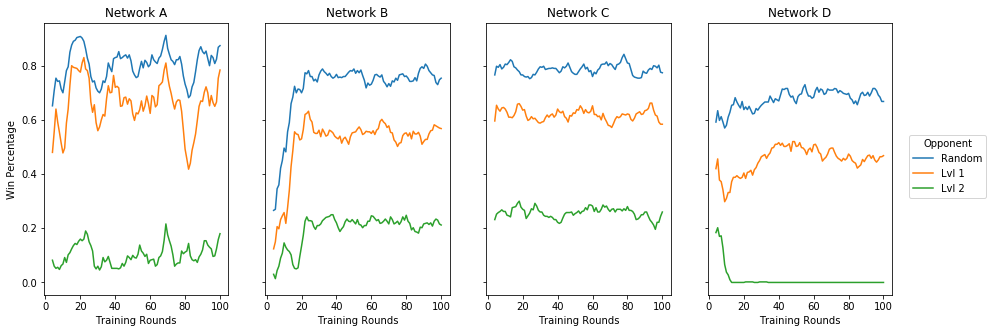

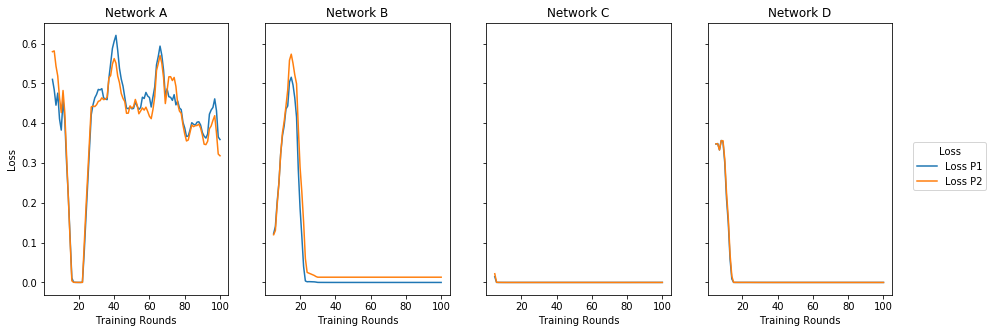

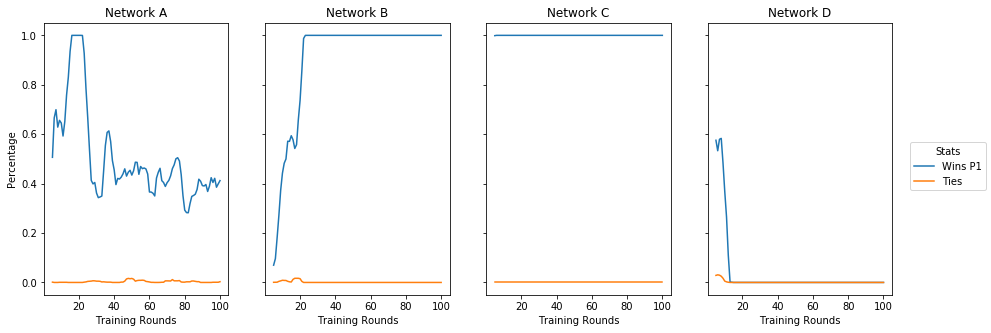

In [126]:
networks = ['A','B','C','D']
loss_fn = 'MSE'
exploration = 'no'
encoding= 'integer'
optimizer = 'Adam'
experience = 'no'
rolling = 5
analysis_networks(networks,loss_fn,exploration,encoding,optimizer,experience,rolling)

## Comparison of networks - No Exploration & Yes Experience

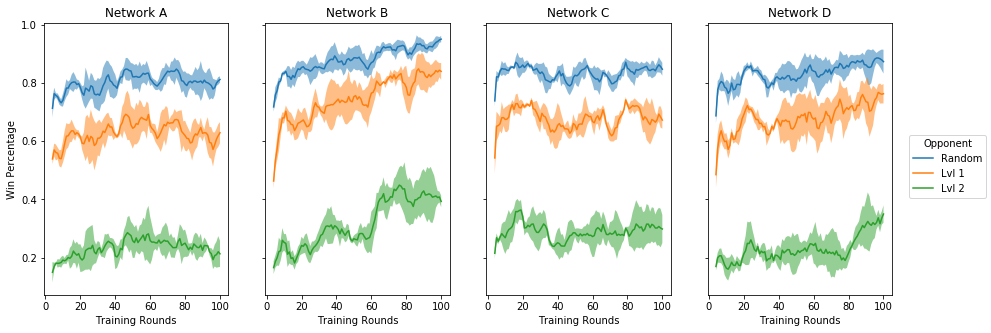

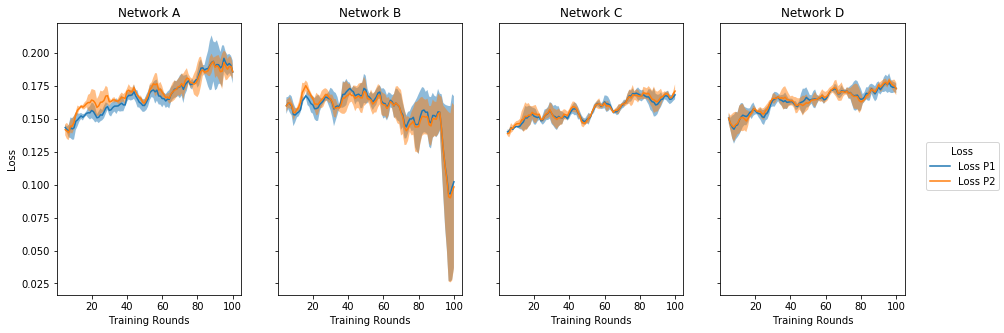

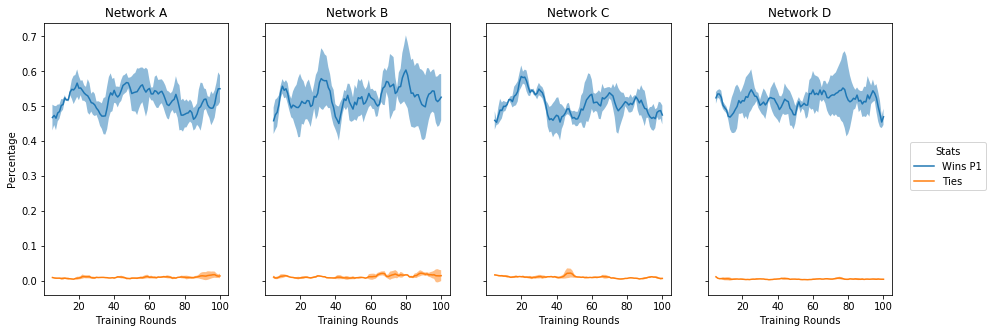

In [127]:
networks = ['A','B','C','D']
loss_fn = 'MSE'
exploration = 'no'
encoding= 'integer'
optimizer = 'Adam'
experience = 'yes'
rolling = 5
analysis_networks(networks,loss_fn,exploration,encoding,optimizer,experience,rolling)

## Comparison of networks - Cte Exploration & Yes Experience

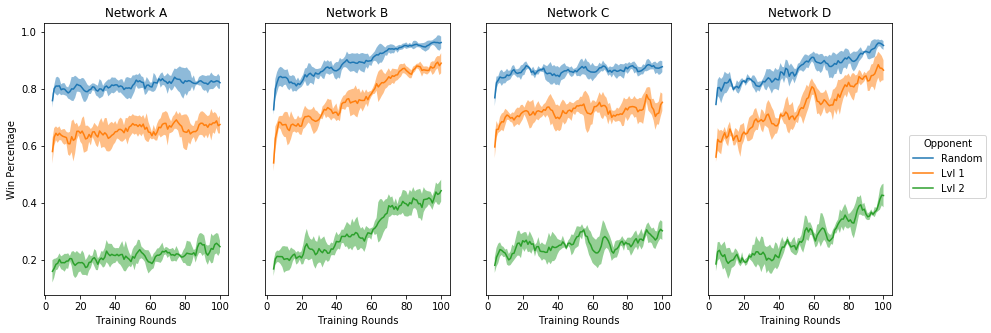

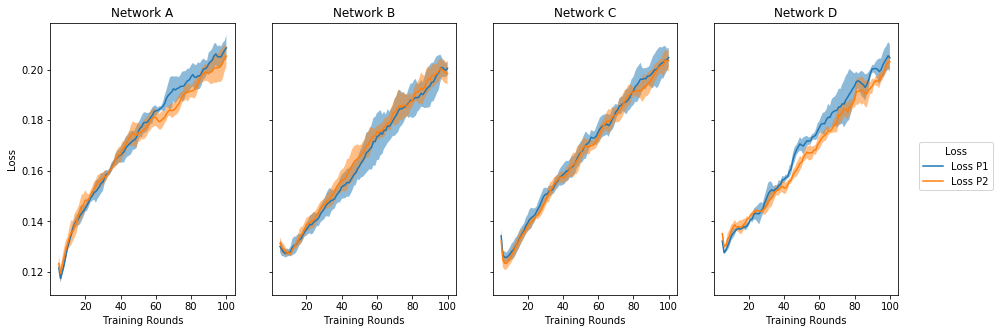

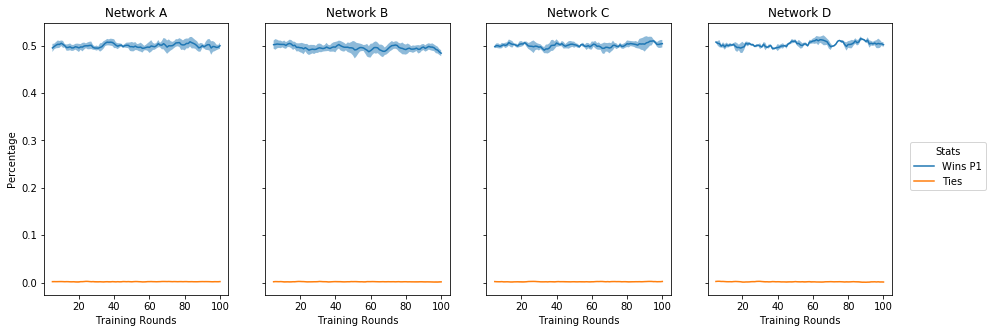

In [129]:
networks = ['A','B','C','D']
loss_fn = 'MSE'
exploration = 'cte'
encoding= 'integer'
optimizer = 'Adam'
experience = 'yes'
rolling = 5
analysis_networks(networks,loss_fn,exploration,encoding,optimizer,experience,rolling)

## Comparison of networks - Decay Training Exploration & Yes Experience

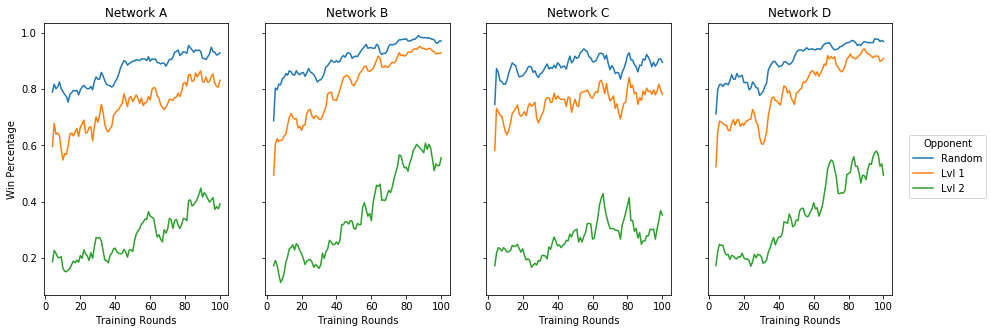

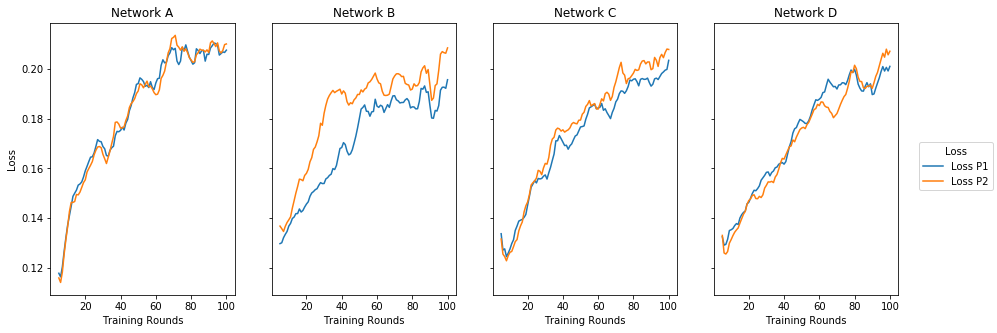

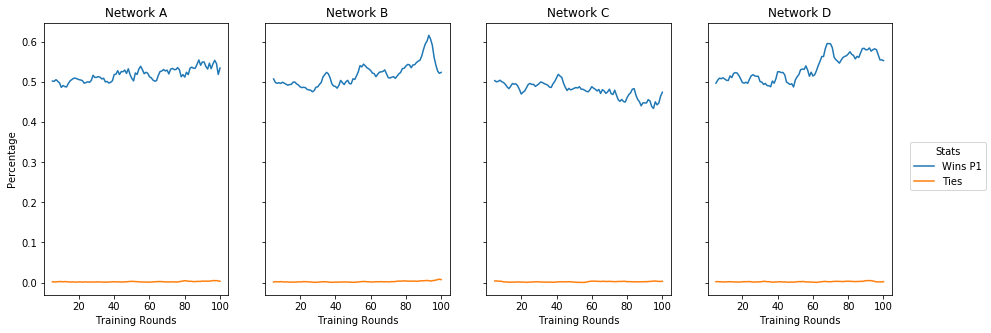

In [130]:
networks = ['A','B','C','D']
loss_fn = 'MSE'
exploration = 'decay_training'
encoding= 'integer'
optimizer = 'Adam'
experience = 'yes'
rolling = 5
analysis_networks(networks,loss_fn,exploration,encoding,optimizer,experience,rolling)

## Comparison of networks - Decay Episode Exploration & Yes Experience

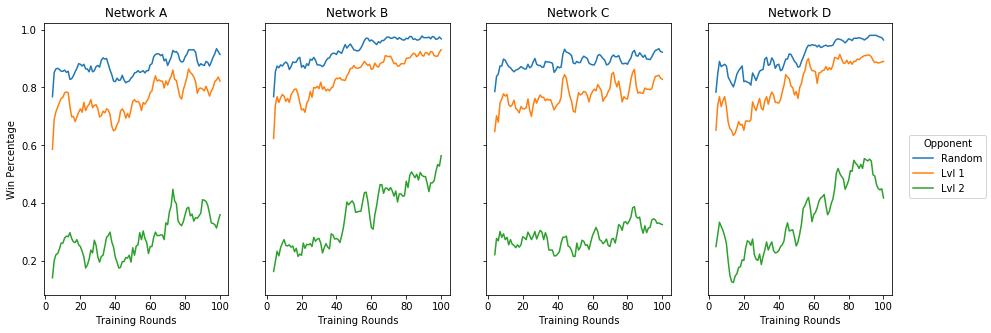

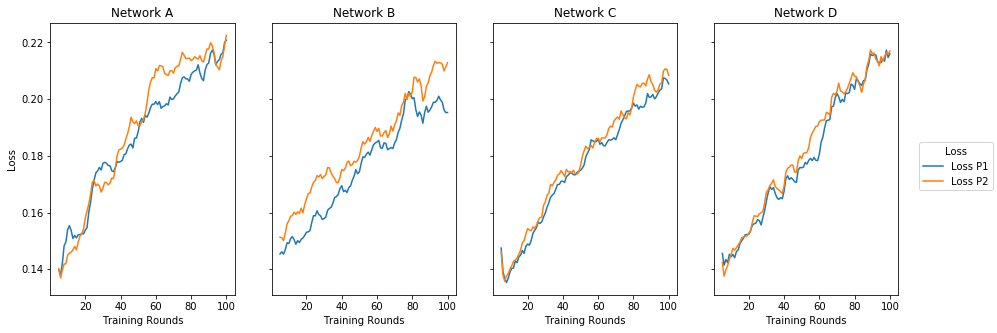

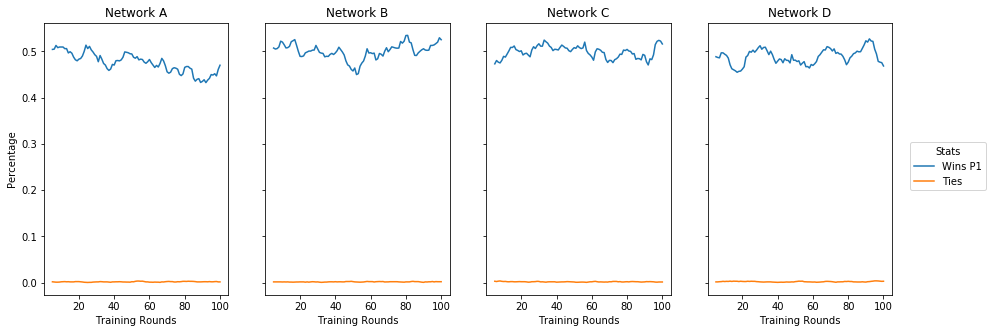

In [131]:
networks = ['A','B','C','D']
loss_fn = 'MSE'
exploration = 'decay_episode'
encoding= 'integer'
optimizer = 'Adam'
experience = 'yes'
rolling = 5
analysis_networks(networks,loss_fn,exploration,encoding,optimizer,experience,rolling)

## Comparison of networks - Boltzmann Exploration & Yes Experience

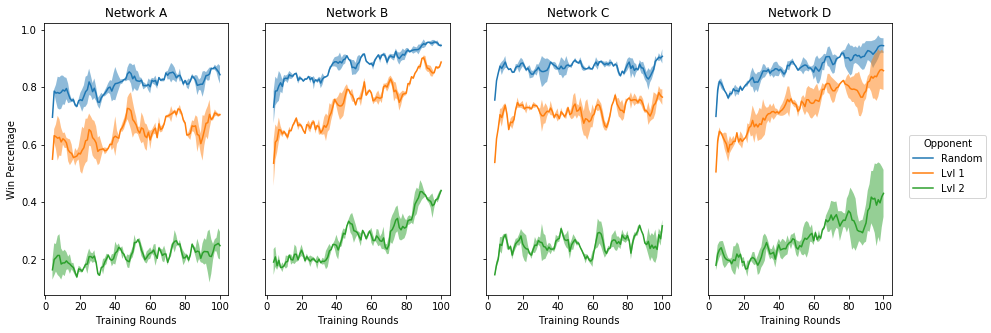

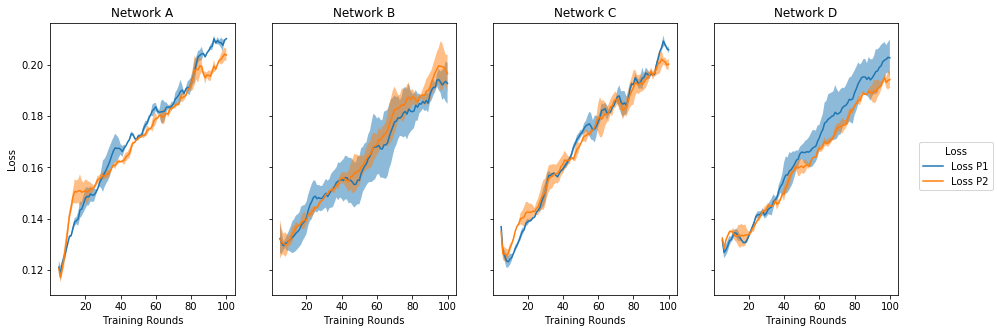

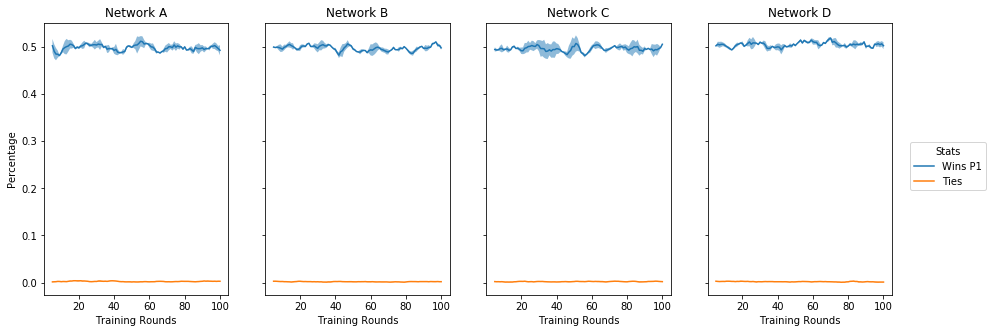

In [132]:
networks = ['A','B','C','D']
loss_fn = 'MSE'
exploration = 'Boltzmann'
encoding= 'integer'
optimizer = 'Adam'
experience = 'yes'
rolling = 5
analysis_networks(networks,loss_fn,exploration,encoding,optimizer,experience,rolling)

## Network B

In [134]:
def plot_exploration_strategies(exploration_strategies,data,ylabel,legend,legend_title):
    fig, axs = plt.subplots(1, len(exploration_strategies),sharex=True,sharey=True,figsize=(15,5))
    for i,exploration in enumerate(exploration_strategies):
        plot(training_rounds,data[exploration],[],axs[i])
        axs[i].set_title('Exploration '+exploration)

    for ax in axs.flat:
        ax.set(xlabel='Training Rounds', ylabel=ylabel)

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    # Create the legend
    fig.legend(labels=legend,loc="right",title=legend_title);

    # Adjust the scaling factor to fit your legend text completely outside the plot
    # (smaller value results in more space being made for the legend)
    plt.subplots_adjust(right=0.91)
    plt.show()

In [135]:
def analysis_exploration_strategies(network,loss_fn,exploration_strategies,encoding,optimizer,experience,rolling):
    benchmark = {}
    stats_loss = {}
    stats_training = {}
    for exploration in exploration_strategies:
        folder = './training/'+network+'_'+loss_fn+'_'+exploration+'_'+encoding+'_'+optimizer+'_'+experience+'/'
        training_rounds,random,left,lvl1,lvl2,loss_p1,loss_p2,game_length,wins,ties = collect_data(folder,rolling)
        benchmark[exploration] = [random,lvl1,lvl2]
        stats_loss[exploration] = [loss_p1,loss_p2]
        stats_training[exploration] = [wins,ties]

    ylabel = 'Win Percentage'
    legend = ['Random','Lvl 1','Lvl 2']
    legend_title = "Opponent"
    plot_exploration_strategies(exploration_strategies,benchmark,ylabel,legend,legend_title)
    ylabel = 'Loss'
    legend = ['Loss P1','Loss P2']
    legend_title = "Loss"
    plot_exploration_strategies(exploration_strategies,stats_loss,ylabel,legend,legend_title)
    ylabel = 'Percentage'
    legend = ['Wins P1','Ties']
    legend_title = "Stats"
    plot_exploration_strategies(exploration_strategies,stats_training,ylabel,legend,legend_title)

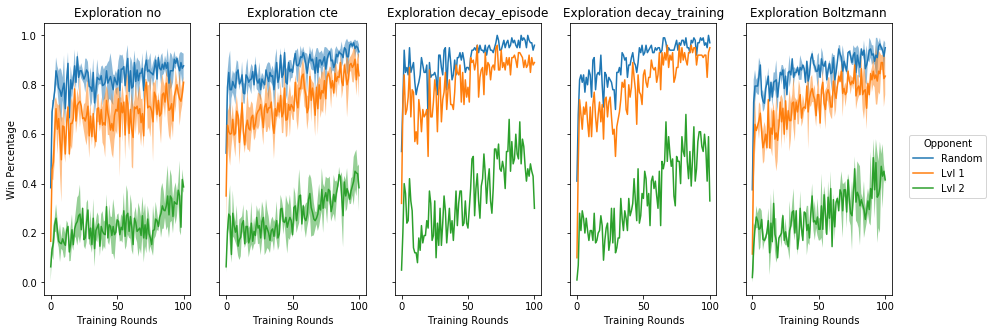

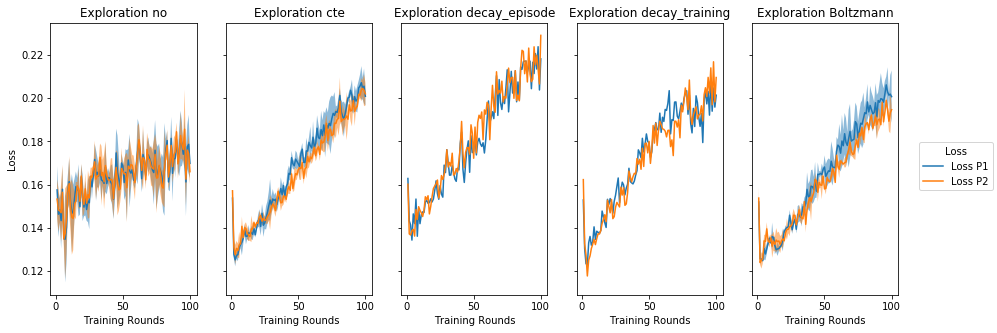

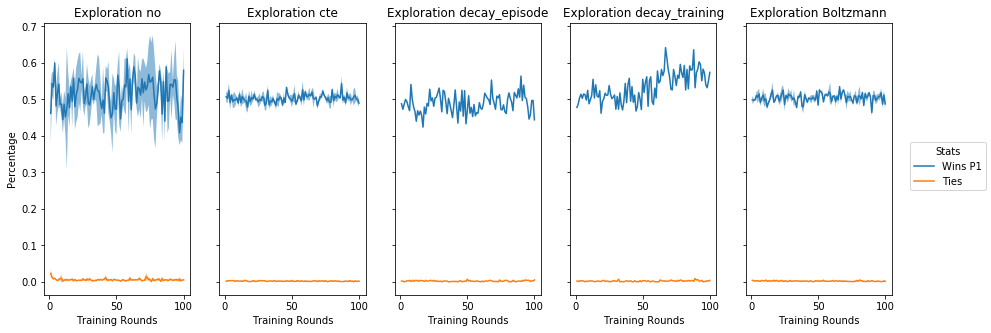

In [139]:
networks = 'B'
loss_fn = 'MSE'
exploration_strategies = ['no','cte','decay_episode','decay_training','Boltzmann']
encoding= 'integer'
optimizer = 'Adam'
experience = 'yes'
rolling = 1
analysis_exploration_strategies(network,loss_fn,exploration_strategies,encoding,optimizer,experience,rolling)